In [1]:
import psycopg2.extras
import pytz
from configparser import ConfigParser
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import mpld3

In [2]:
#sign into database


In [5]:
#log_area dataframe 
def log_area_df(case,month_num):
    with conn.cursor() as cursor:
        print('PostgreSQL database version:')
        cursor.execute('SELECT version()')
        # display the PostgreSQL database server version
        db_version = cursor.fetchone()
        print(db_version)
        #executes the sql query (2 situation, case 1 -> exact month, else all months before x
        if case == 1:
            cursor.execute ("select log_area, count(*) as log_area_count from chp_incident Where log_type not like %s and coordinates != '(0,0)' and extract('month' from log_time) = %s Group by log_area Order by log_area_count desc",('%Advisory%',month_num))
        else:
            cursor.execute ("select log_area, count(*) as log_area_count from chp_incident Where log_type not like %s and coordinates != '(0,0)' and extract('month' from log_time) < %s Group by log_area Order by log_area_count desc",('%Advisory%',month_num))
        #fetches the query
        log_area_list = cursor.fetchall()

        #put list into a df 
        log_area_list = pd.DataFrame(log_area_list, columns = ['log_area','log_area_count'])                  
        df_log_area  = log_area_list
        return df_log_area

#creating single bar graph
def single_bar(df,title):
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center')
     
    if __name__ == '__main__':
       
        # creating data on which bar chart will be plot
        x4 = df.log_area.head(10)
        y4 = df.log_area_count.head(10)
         
        # setting figure size by using figure() function 
        plt.figure(figsize = (18, 10))
         
        # making the bar chart on the data
        plt.bar(x4, y4, color ='firebrick')
         
        # calling the function to add value labels
        addlabels(x4, y4)
         
        # giving title to the plot
        plt.title(title)
    
        # giving X and Y labels
        plt.xlabel("Reported Areas")
        plt.ylabel("Frequency")
    
        #saves the figure  
        bar_fig4 = plt.gcf()
        bar_fig4.savefig('Top 10 Highest Incident Areas from January to May 2024.png', dpi=100)
        
        # visualizing the plot
        plt.show()


PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)


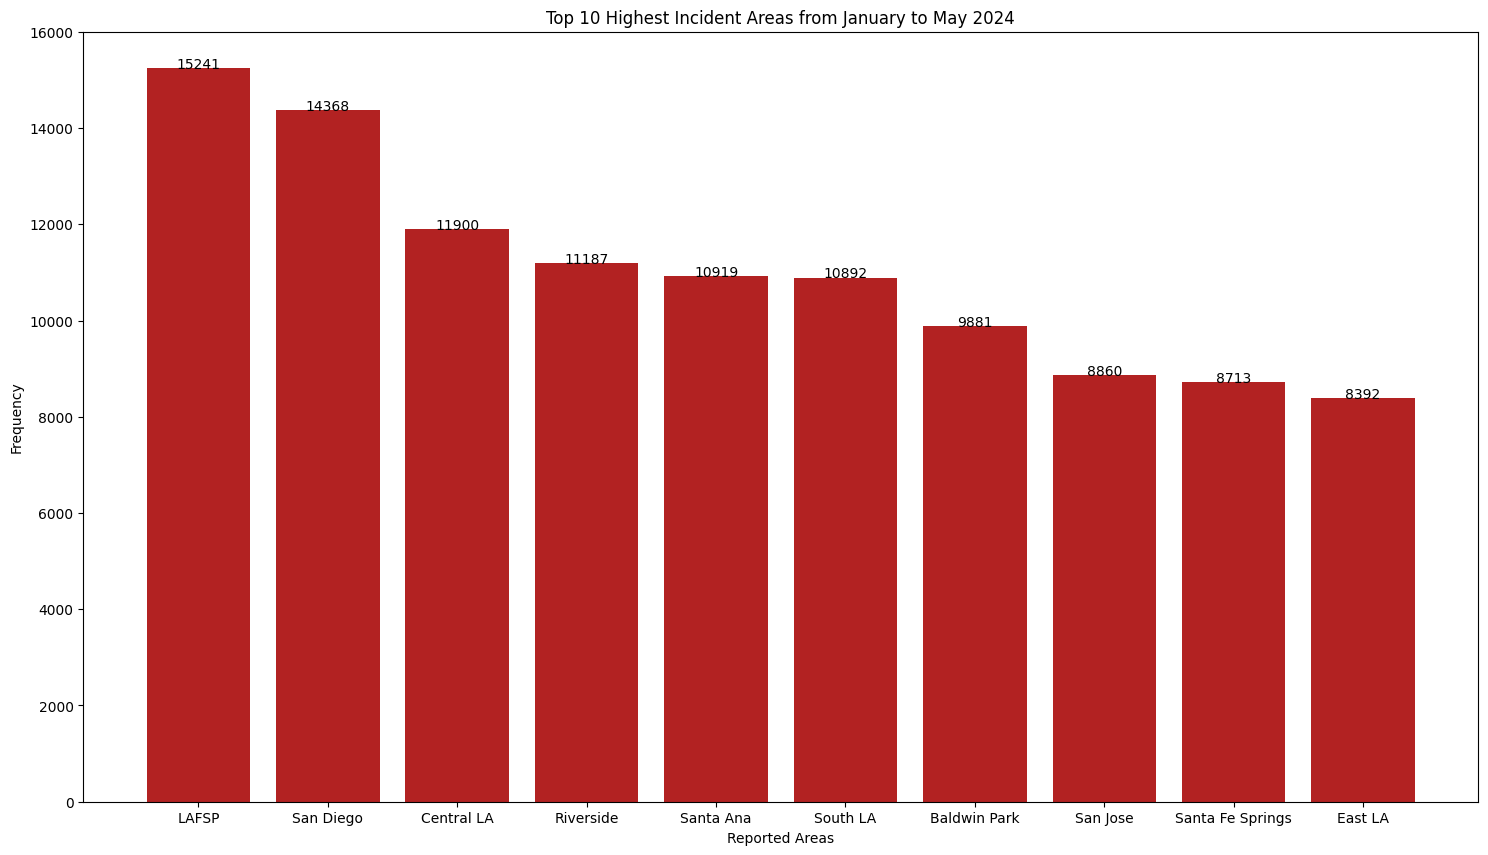

In [6]:
single_bar(log_area_df(2,6),"Top 10 Highest Incident Areas from January to May 2024")

In [7]:
def top_10_month(df,month):
    head = df.log_area.head(10)
    count = df.log_area_count.head(10)
    month_df = np.full(10,month)
    return head, count, month_df

In [8]:
jan_head,jan_count,jan_month = top_10_month(log_area_df(1,1),"January")
feb_head,feb_count,feb_month = top_10_month(log_area_df(1,2),"February")
mar_head,mar_count,mar_month = top_10_month(log_area_df(1,3),"March")
apr_head,apr_count,apr_month = top_10_month(log_area_df(1,4),"April")
may_head,may_count,may_month = top_10_month(log_area_df(1,5),"May")
#jun_head,jun_count,jun_month = top_10_month(log_area_df(1,6),"June")

PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)
PostgreSQL database version:
('PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-6), 64-bit',)


In [9]:
top_10_df = pd.DataFrame({
    "Log Area": np.concatenate((jan_head,feb_head,mar_head,apr_head,may_head)),
    "Count": np.concatenate((jan_count,feb_count,mar_count,apr_count,may_count)),
    "Month": np.concatenate((jan_month,feb_month,mar_month,apr_month,may_month))
})
           

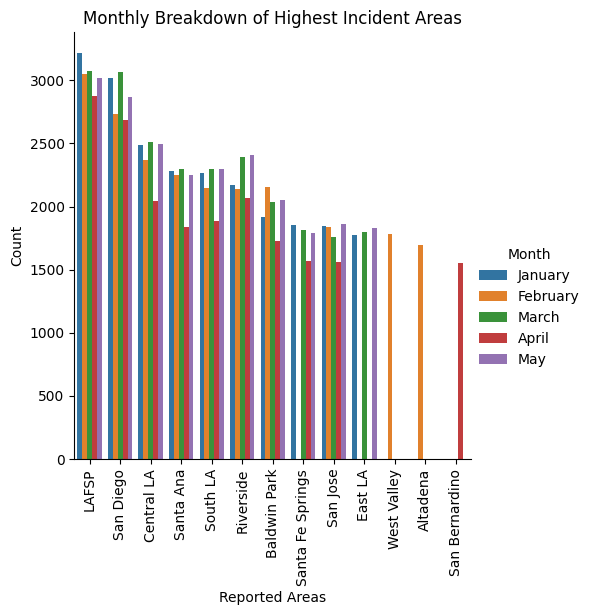

In [10]:
# Draw a grouped barplot
g = sns.catplot(
    data = top_10_df, kind="bar",
    x="Log Area", y="Count", hue="Month"
)



# Rotate x-axis labels
plt.xticks(rotation=90)

# Adjust font size
plt.xticks(fontsize=10)

plt.title("Monthly Breakdown of Highest Incident Areas")
g.set_axis_labels("Reported Areas", "Count")

# Save the combined plot
plt.savefig('grouped_bar_plot.png', bbox_inches='tight')
